In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from matplotlib.patches import Rectangle
from itertools import product, combinations

# Please run mc_gpu_cube.py before of plotting the figures

points_total = np.load('points_total_cube.npy')
points = np.load('points_cube.npy')

<IPython.core.display.Javascript object>


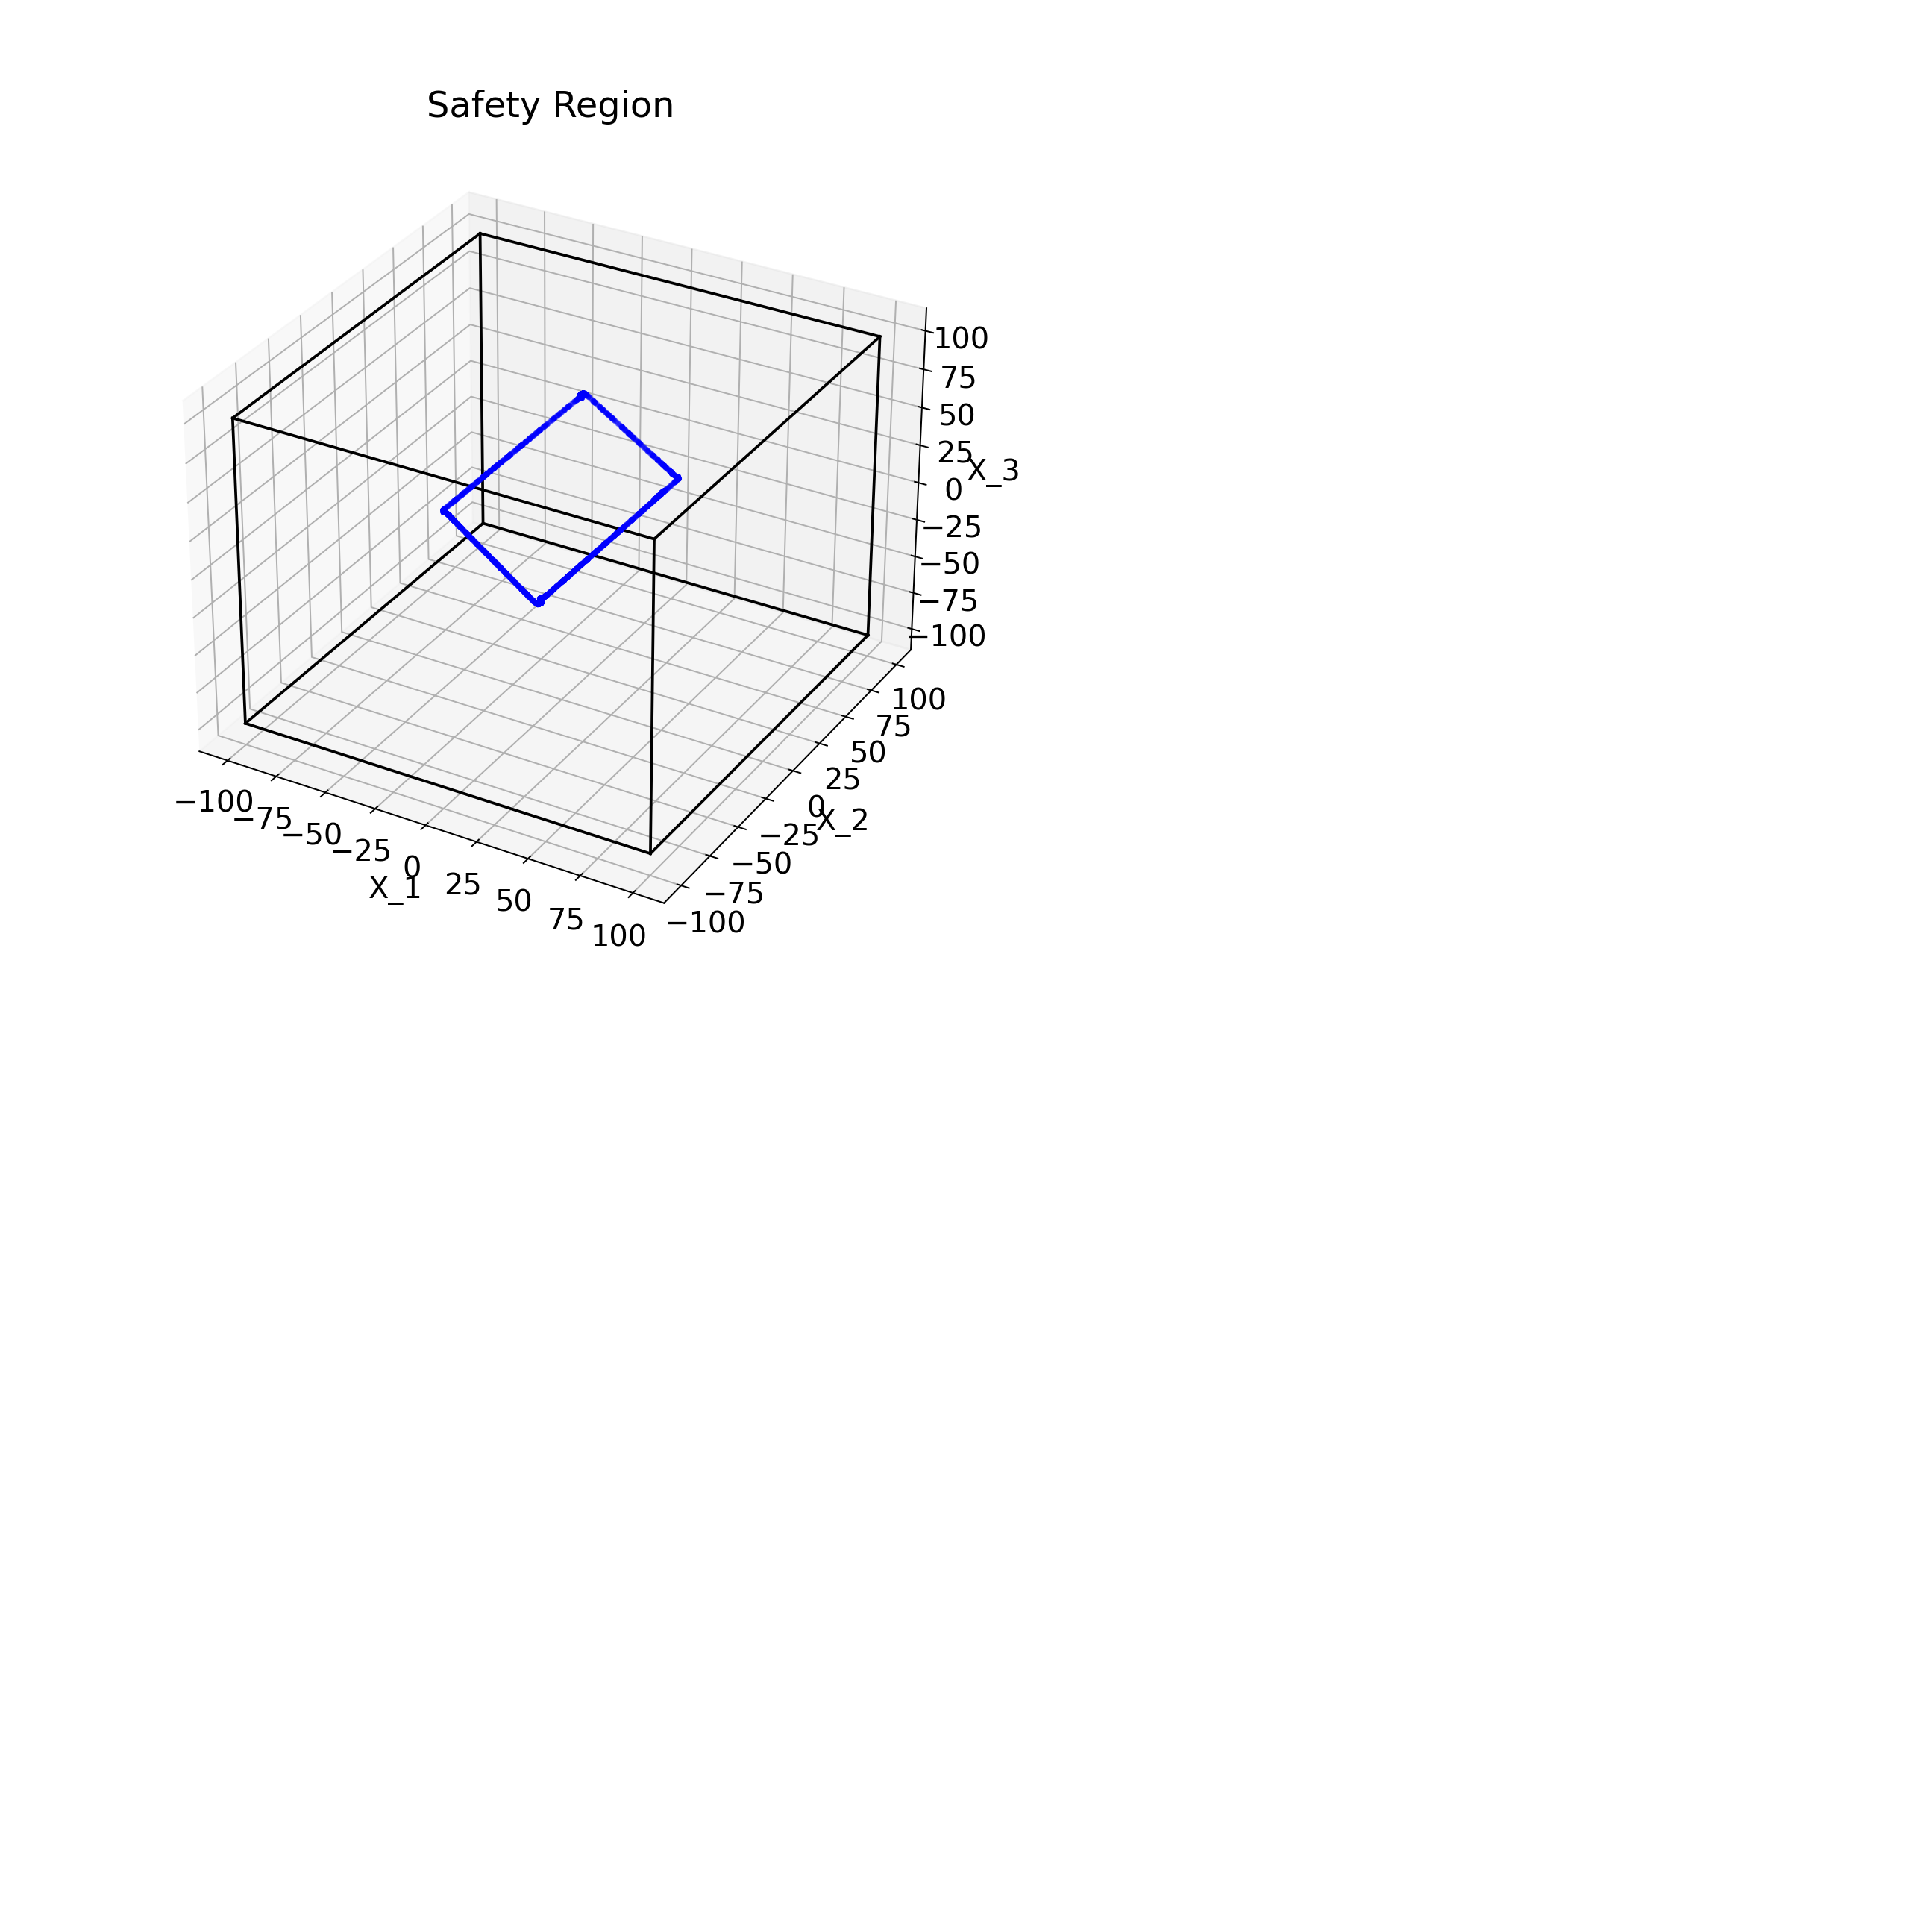

In [2]:
%matplotlib notebook
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

plt.title('Safety Region')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('X_3')

cube = np.array([[-100., -100., -100.], [100., 100., 100.]])
ax.scatter(points_total[:,0], points_total[:,1], points_total[:,2], marker='o', color="b", s=5.)

for s, e in combinations(np.array(list(product(cube[:,0], cube[:,1], cube[:,2]))), 2):
    if np.sum(s==e) > 1 : ax.plot3D(*zip(s, e), color="black")
            
plt.show()

<IPython.core.display.Javascript object>


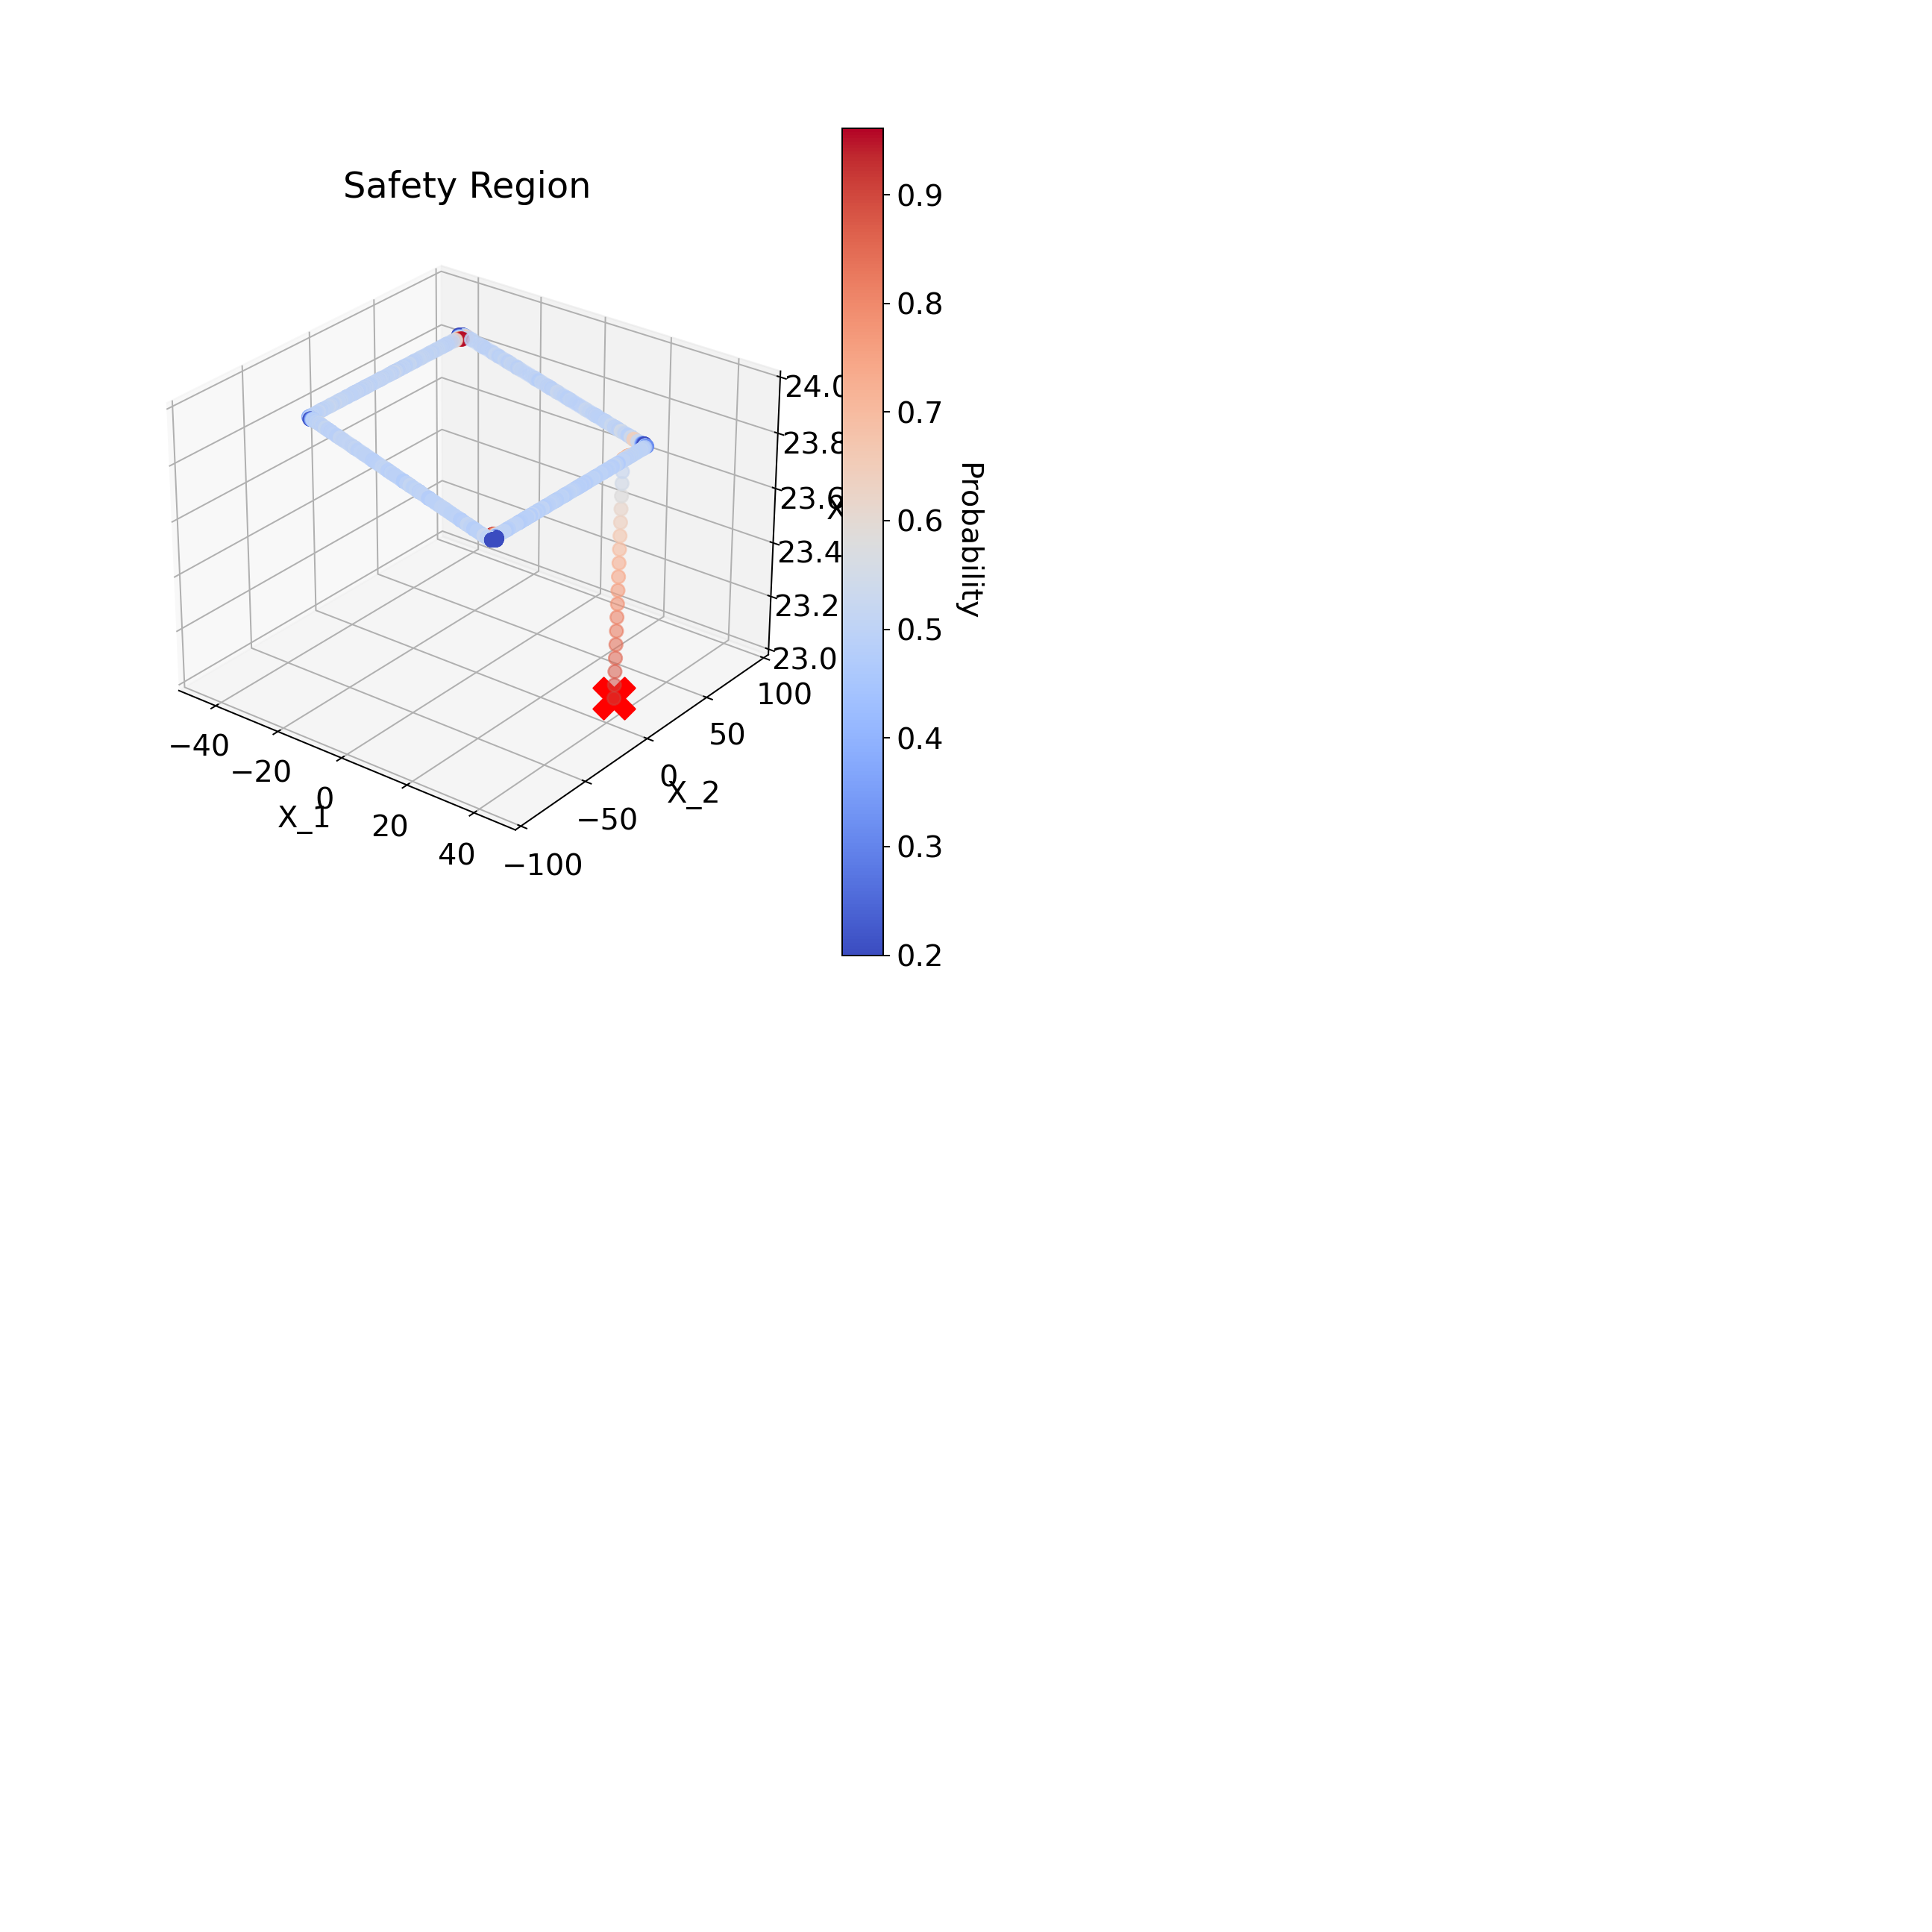

In [4]:
%matplotlib notebook

cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

plt.title('Safety Region')
ax.set_xlim(-50, 50)
ax.set_ylim(-100, 100)
ax.set_zlim(23, 24)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('X_3')

color_bar = np.minimum(1, np.maximum(0.2, points_total[:,3]))
ax.scatter(points_total[0,0], points_total[0,1], points_total[0,2], marker='X', color="r", s=500.)        
p = ax.scatter(points_total[:,0], points_total[:,1], points_total[:,2], 
           c=color_bar, cmap=cm, s=50)

cbar = plt.colorbar(p)
cbar.ax.set_ylabel('Probability', rotation=270, labelpad=20)
plt.show()


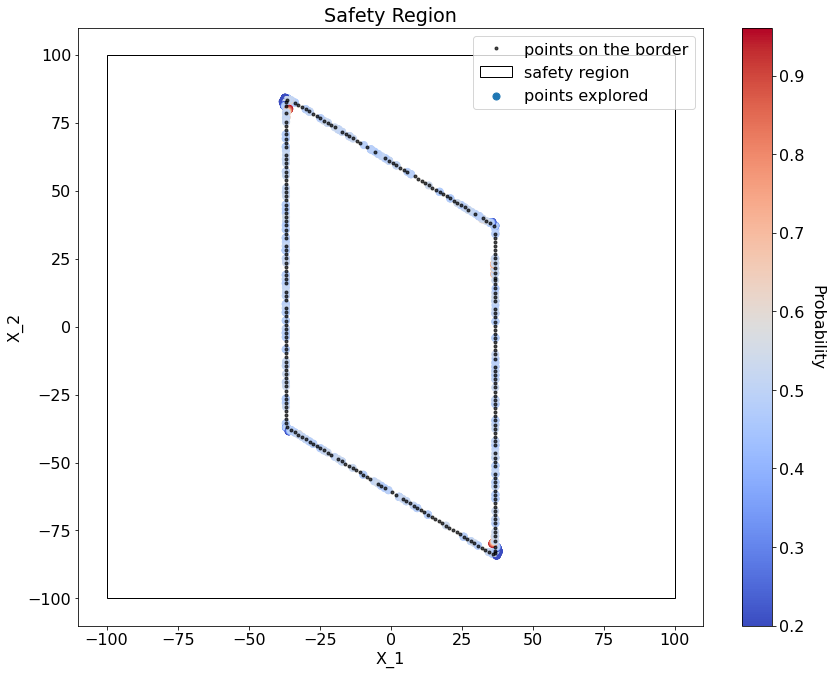

In [5]:
%matplotlib inline

plt.rcParams.update({'font.size': 16})

cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(14,11))
ax = plt.axes()

plt.title('Safety Region')
plt.xlabel('X_1')
plt.ylabel('X_2')

idx = points[-1,2]
idx = np.arange(points_total.shape[0])[points_total[:,2]==idx]

cube = np.array([[-100., -100., -100.], [100., 100., 100.]])
ax.add_patch(Rectangle((cube[0,:2]), cube[1,0]-cube[0,0], cube[1,1]-cube[0,1], 
                       fill=False, color='black', label='safety region'))

idx2 = idx[np.logical_and(0.491 <= points_total[idx,3], points_total[idx,3]<= 0.509)]
idx1 = idx[np.logical_or(0.491 >= points_total[idx,3], points_total[idx,3] >= 0.509)]

color_bar = np.minimum(1, np.maximum(0.2, points_total[idx1,3]))
plt.scatter(points_total[idx1,0], points_total[idx1,1], c=color_bar, 
            cmap=cm, s=50, label='points explored') 
plt.plot(points_total[idx2,0], points_total[idx2,1], 
         '.', color='black', alpha=0.7, label = 'points on the border') 
ax.legend()

cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability', rotation=270, labelpad=20)
plt.show()